In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [69]:
data=pd.read_csv("insurance.csv")

In [70]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [71]:
data.isna().sum() #no null values


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: >

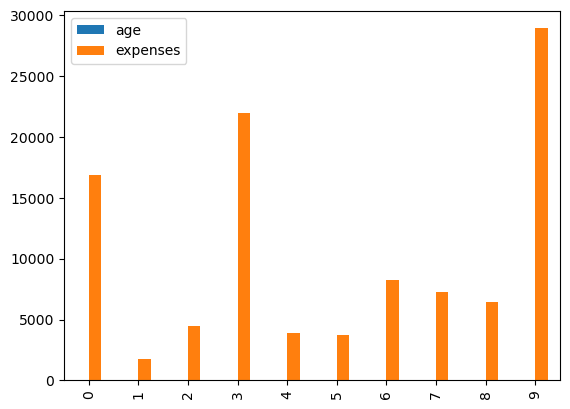

In [86]:
df=data[['age','expenses']]
df.iloc[0:10,:].plot(kind='bar')

<Axes: >

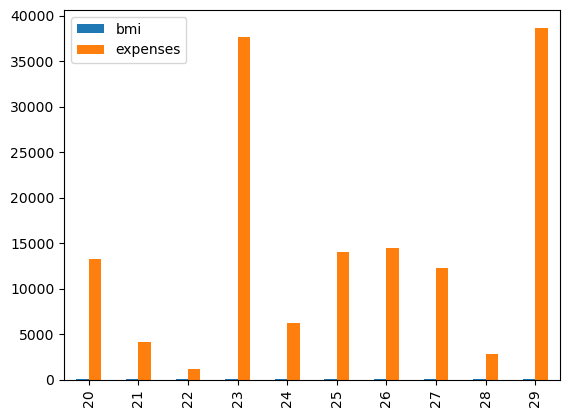

In [89]:
df.iloc[20:30,:].plot(kind='bar')

<Axes: >

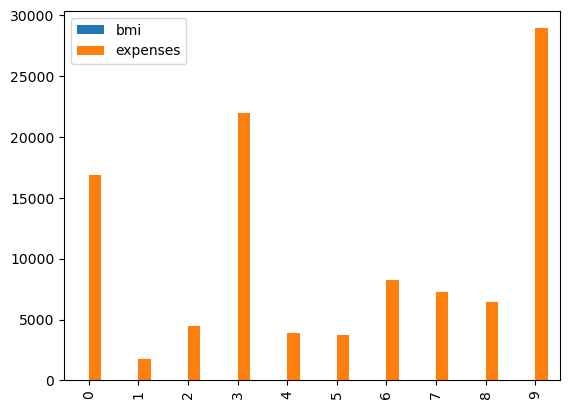

In [88]:
df=data[['bmi','expenses']]
df.iloc[0:10,:].plot(kind='bar')

<Axes: >

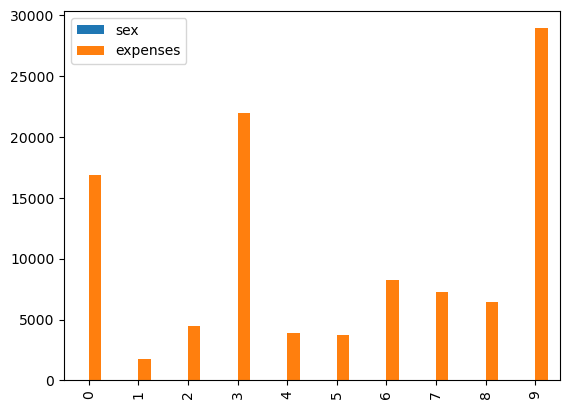

In [87]:
df=data[['sex','expenses']]
df.iloc[0:10,:].plot(kind='bar')

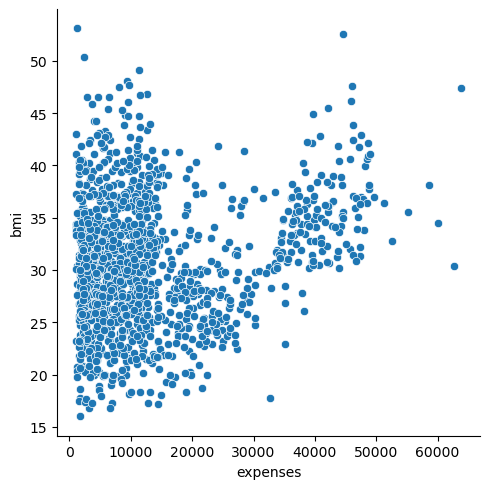

In [90]:
snr.relplot(x='expenses',y='bmi',data=data)

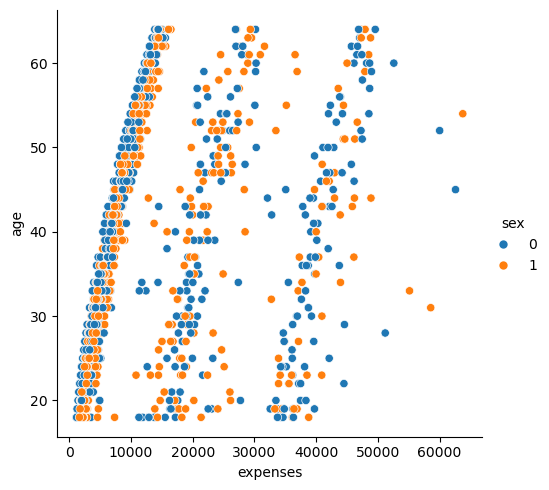

In [91]:
snr.relplot(x='expenses',y='age',hue='sex',data=data)

In [72]:
#converting the categorical values into corresponding numeric representation- this is the easiest way because here categorical data is less but we have different methods which we use in large categorical data
data['sex']=data['sex'].apply({'female':1,'male':0}.get) #get() will superimposed numeric values over data inside dictionaries

In [73]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86


In [74]:
data['smoker']=data['smoker'].apply({'yes':1,'no':0}.get)
data['region']=data['region'].apply({'southeast':1,'southwest':2,'northeast':3,'northwest':4}.get)

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,4,21984.47
4,32,0,28.9,0,0,4,3866.86


In [76]:
x=data.drop(['expenses'],axis=1)
y=data['expenses']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [78]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [79]:
model.fit(x_train,y_train)

LinearRegression()

In [80]:
y_hat=model.predict(x_test)

In [81]:
accuracy=model.score(x,y)

In [82]:
print(accuracy)

0.74992043020436


In [83]:
from sklearn.metrics import r2_score
score=r2_score(y_hat,y_test)

In [84]:
print(score)

0.6445014384959122
